###  Step1: Reading and Understanding the data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
bike = pd.read_csv('day.csv')

In [3]:
# checking top few rows of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the datatype and null values in the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the distribution of numerical columns 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking the shape of the data frame
bike.shape

(730, 16)

##### Data is well behaved as it does not have missing values or outliers.  

### Step 2 :  Exploratory data analysis 

##### Data type manipulation

In [7]:
# changing the data type of the dteday column
bike['dteday']=pd.to_datetime(bike['dteday'])

In [8]:
# changing the data type of categorical variables

bike[['season','mnth','weekday','weathersit']]=bike[['season','mnth','weekday','weathersit']].astype('category')
        
        
bike.info()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(4), datetime64

- Now all the columns are in the correct data type

In [9]:
# changing the categories from number to abbr because model will understand that all months have differnt importance based on there magnitude.
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike['mnth'].unique()

[Jan, Feb, Mar, Apr, May, ..., Aug, Sep, Oct, Nov, Dec]
Length: 12
Categories (12, object): [Jan, Feb, Mar, Apr, ..., Sep, Oct, Nov, Dec]

In [10]:
# replacing the number of days with abbr according to calendar
bike['weekday']=bike['weekday'].replace({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'})

In [11]:
# replacing the name of the categories with labels
def season(x):
    
    if x==1:
        return 'Spring'
    elif x==2:
        return 'Summer'
    elif x==3:
        return 'Fall'
    else:
        return 'Winter'

bike['season']=bike['season'].apply(season)

In [12]:
# replacing the  weathersit categories with labels
season_map = {1:'Clear',2:'Cloudy',3:'Light rain',4:'Heavy rain'}
bike['weathersit']=bike['weathersit'].map(season_map)



##### Categorical analysis :

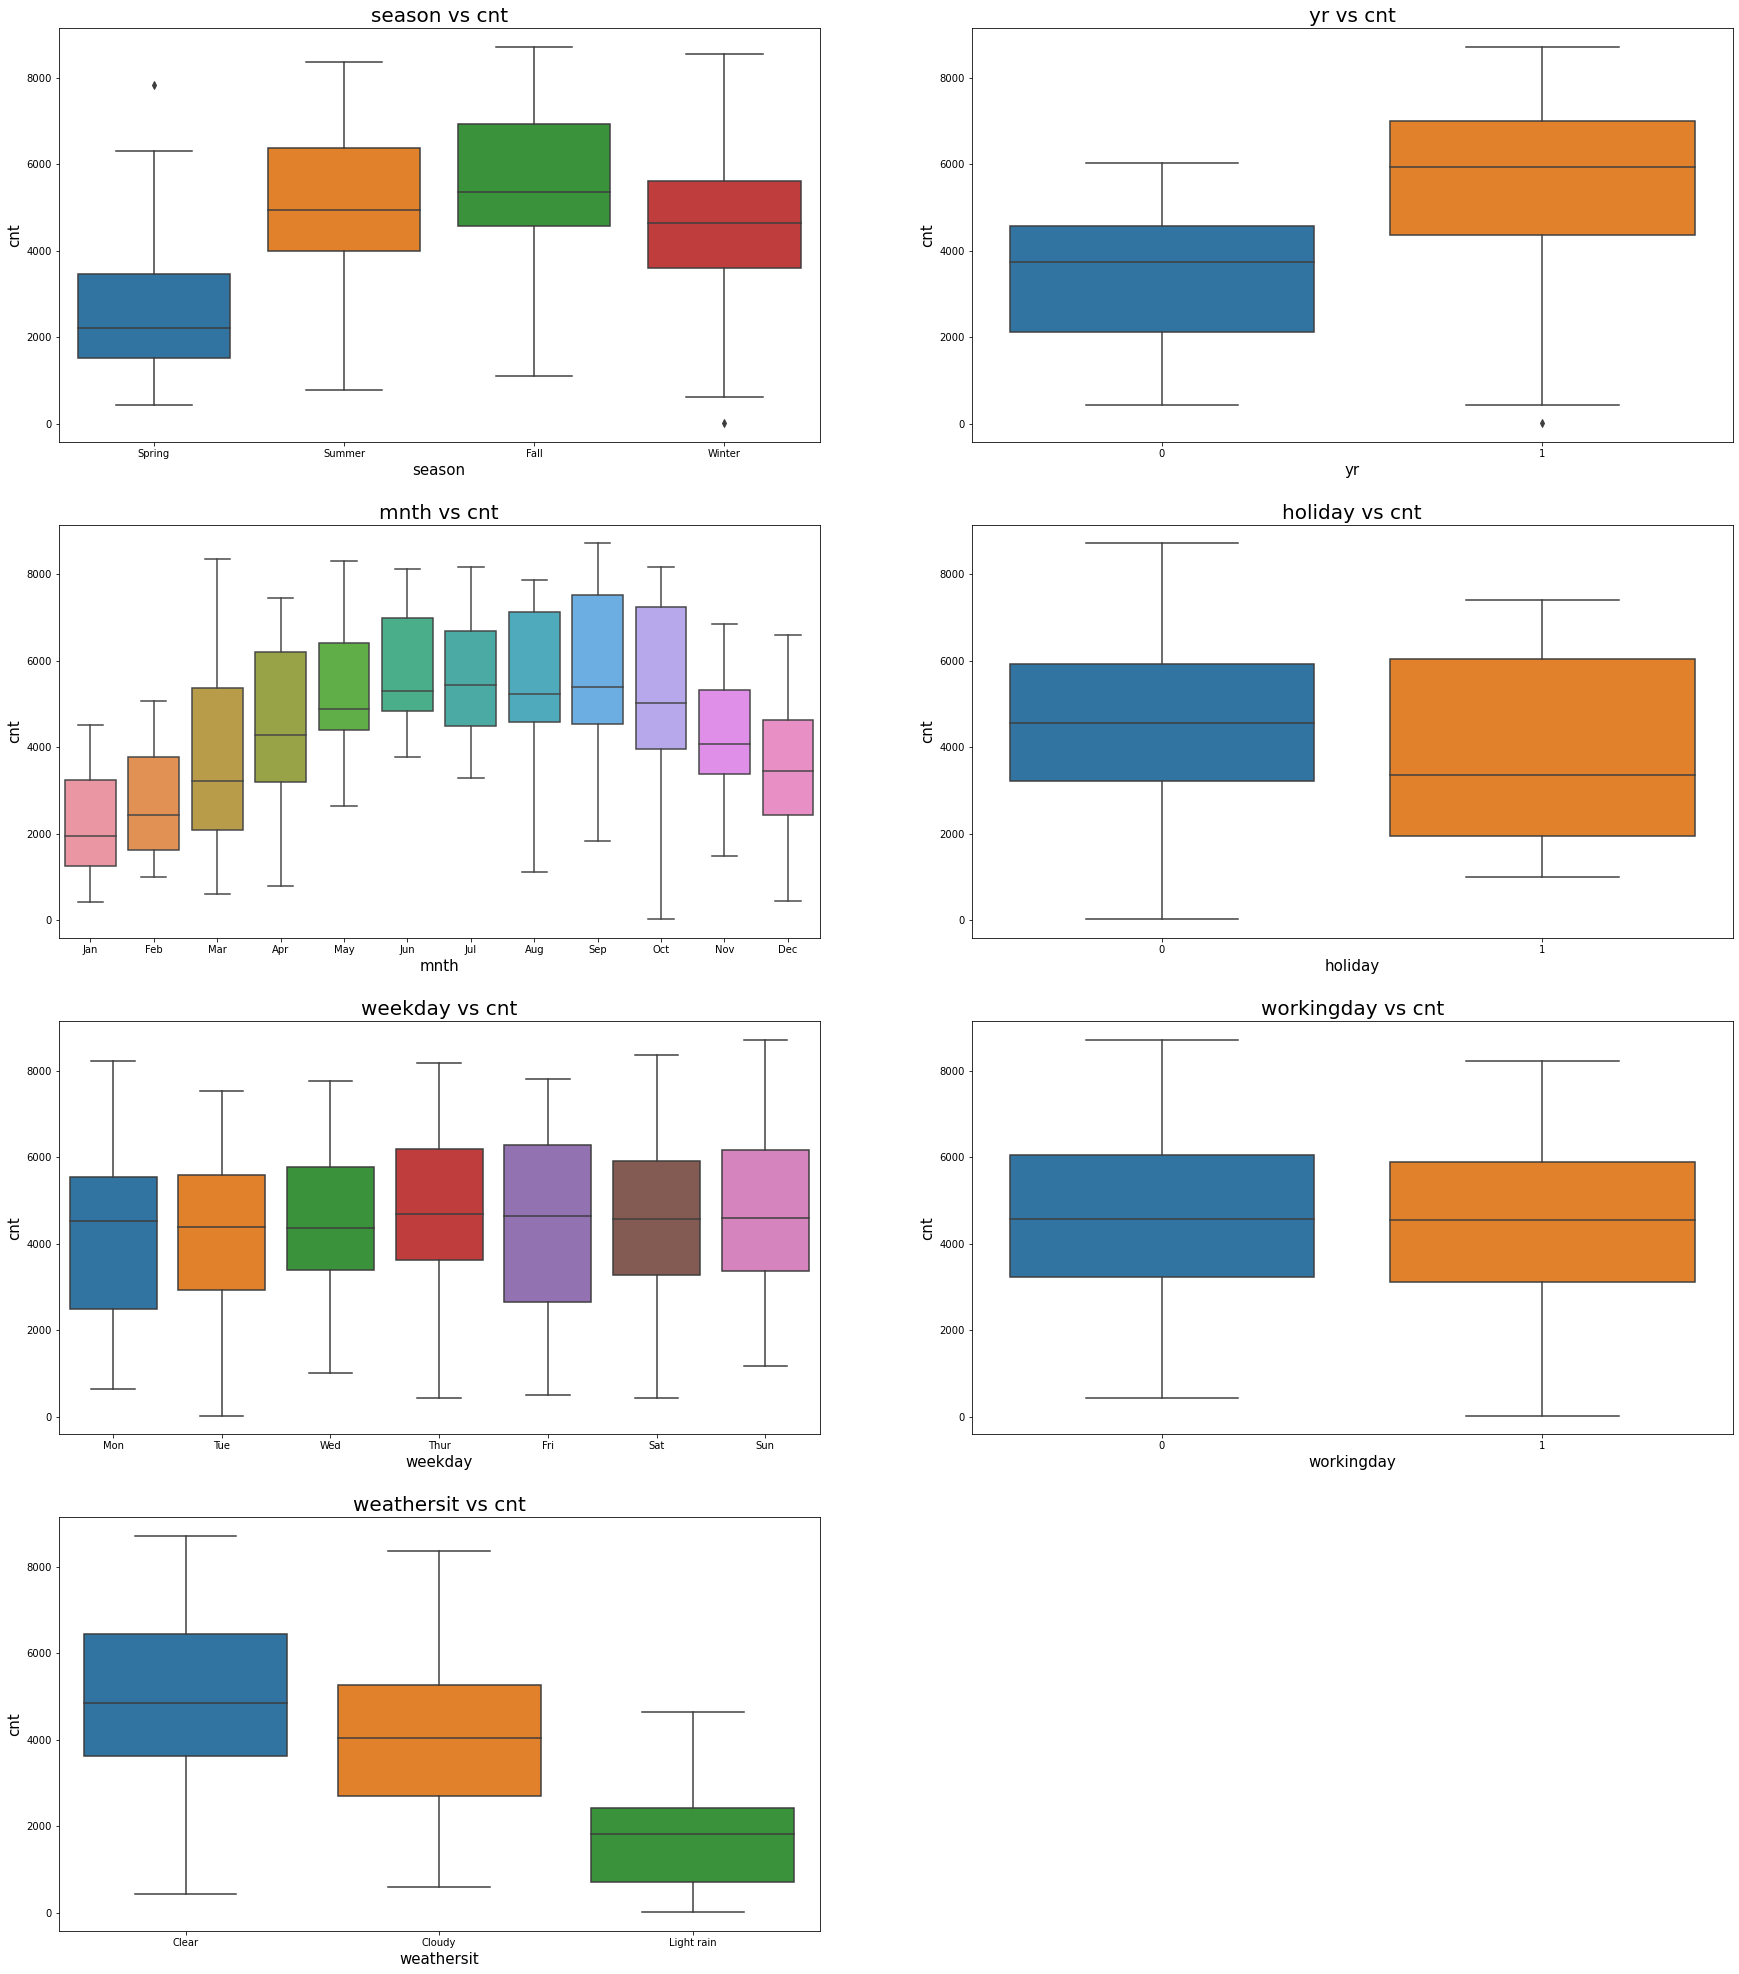

In [13]:
# checking the patterns in the categorical columns
plt.figure(figsize =(30,35))
cat_num=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in enumerate(cat_num):
    plt.subplot(4,2,i[0]+1)
    plt.title('{} vs cnt'.format(i[1]),fontdict = {'fontsize' : 20})
    plt.xlabel(i[1],fontsize=15)
    plt.ylabel('cnt',fontsize=15)
    sns.boxplot(x=i[1], y="cnt", data=bike)

##### Insights:
- We can observe from season vs cnt plot that summer and fall season have the highest customer demand this pattern is also visible from month and wethersit columns.
- We can also see that there has been an overall increase in the customers compared to last year which says that people are accepting their model. 
- We can observe that on holidays the count of customers is decreased.
- There is no relation between weekday and the count of the customers.

In [14]:
# general fuction for univariate categorical variables.
def num_cat(i):
    plt.figure(figsize=[15,6])
    plt.title('Mean customer count vs {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Mean cnt')
    (bike.groupby(i)['cnt'].mean()).plot(kind='bar')

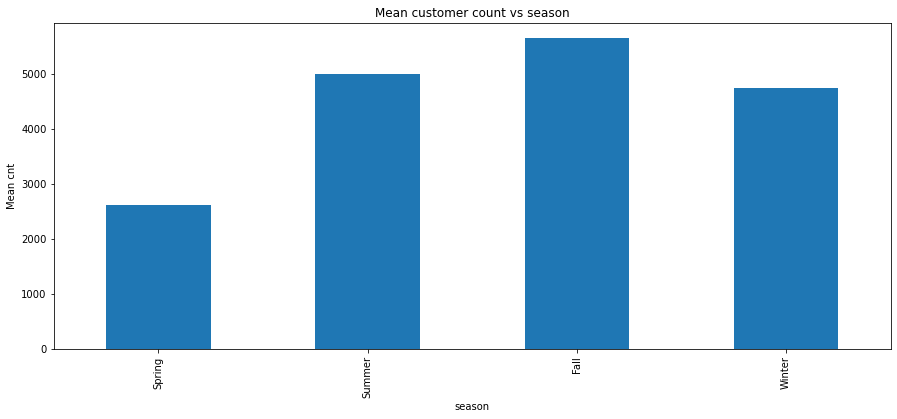

In [15]:
# analysing season column
num_cat('season')

##### Inference:
- We can see that we have highest customers in fall season and lowest in spring season.
- summer and winter season have almost the similar number of customers.

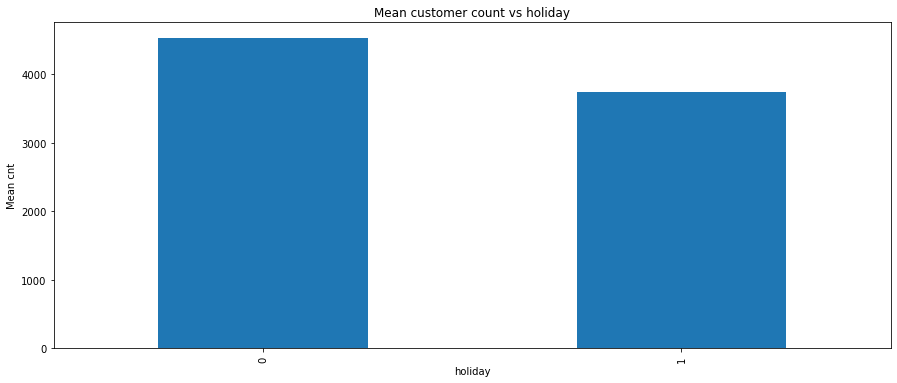

In [16]:
# analysing holiday column
num_cat('holiday')

#####  Inference:
- There is not a huge difference in the count of the customers on a day of holiday but we can see that on holiday there has been a decrease of customers.


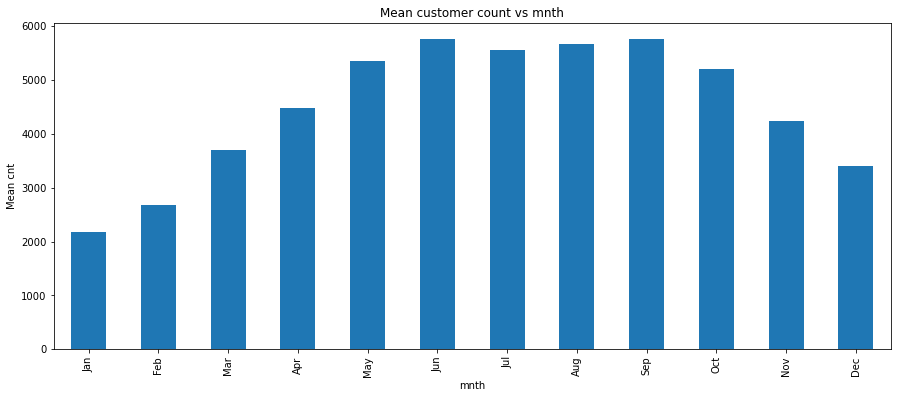

In [17]:
# analysing mnth column
num_cat('mnth')

##### Inference:
- we can see a clear pattern here where there is a dip in number of customers in the start and end of the year and rise during the mid of the year.

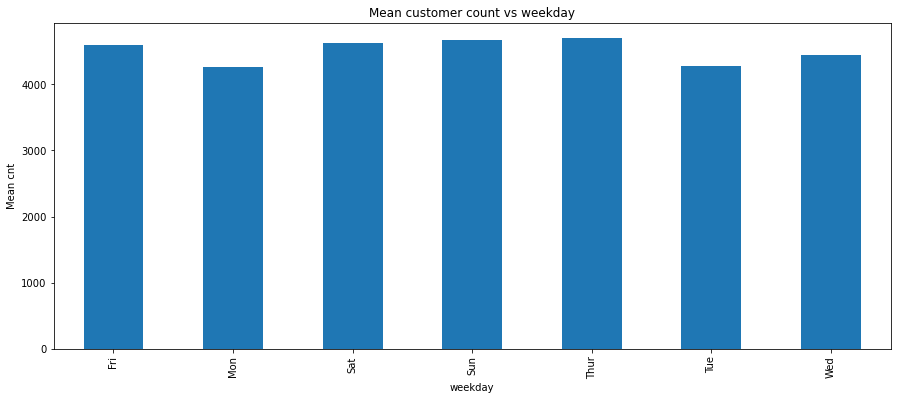

In [18]:
# analysing weekday column
num_cat('weekday')

##### Insingt :
- we can say that weekday does not have effect on number of customers.

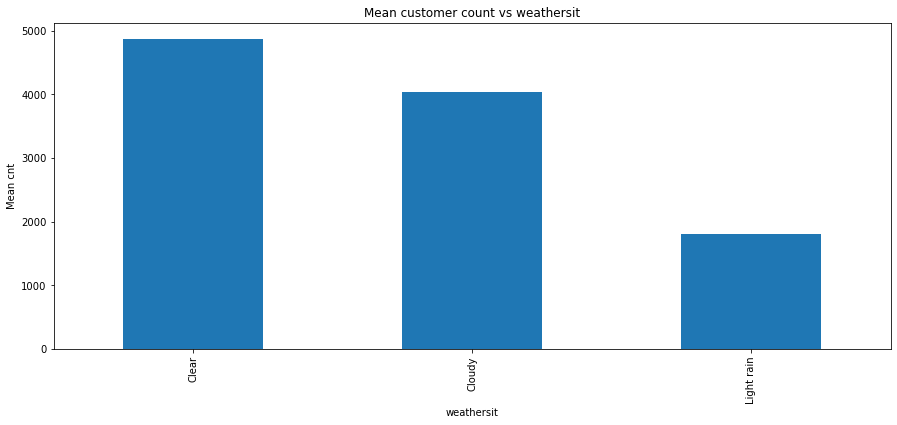

In [19]:
# analysing weathersit column
num_cat('weathersit')

##### Insight :
- We can see that there is a decrease in number of customers when the weather is cloudy or having light rain.

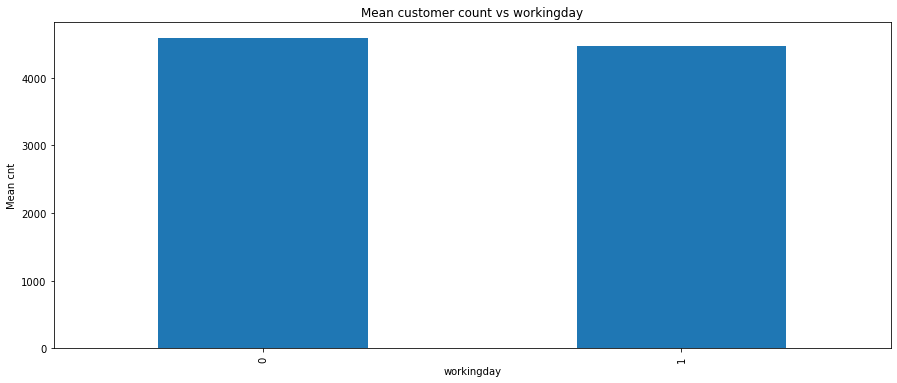

In [20]:
# analysing workingday column
num_cat('workingday')

#####  Insight:
- We can say that there is no relation between working day and number of customers.

#####  Numerical analysis:

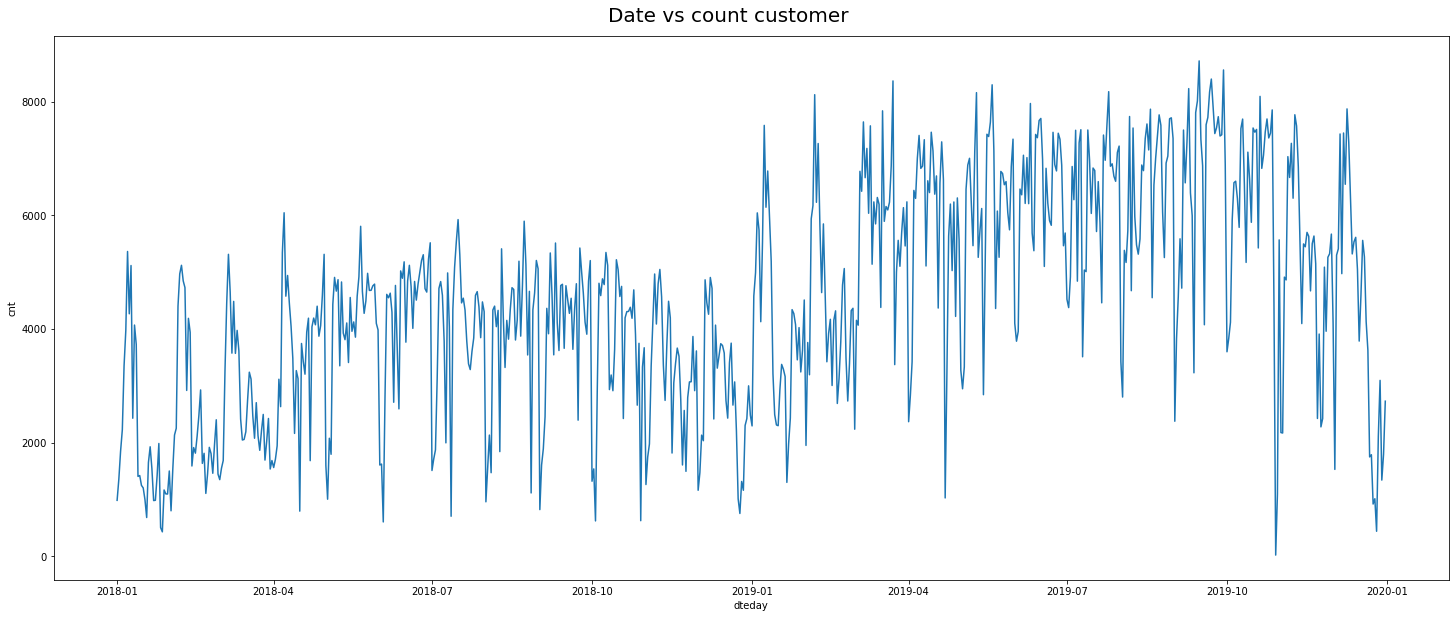

In [21]:
#first lets check if the cnt of customers have gone down on not as stated by the company
plt.figure(figsize=[25,10])
plt.figtext(.5,.9,'Date vs count customer', fontsize=20, ha='center')
sns.lineplot(data=bike,x='dteday',y='cnt')
plt.show()

#### Insight:
- we can see a sudden drop in the graph after 10- 2019 mark so the company have rightly stated that there is decline in customers recently.

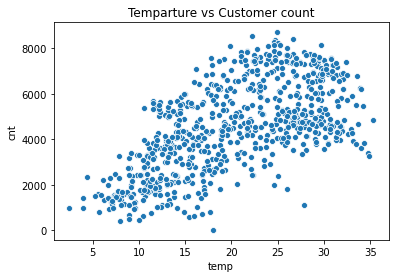

In [22]:
# Analysing temparature column
sns.scatterplot(data=bike,x='temp',y='cnt')
plt.title('Temparture vs Customer count')
plt.show()

##### Insight :
- we can see here that as the temp increases the count of customers also increases.

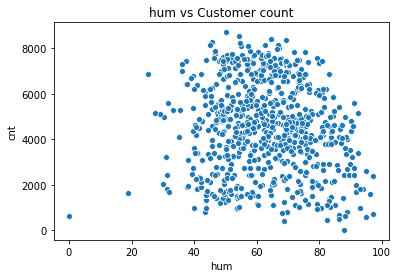

In [23]:
# Analysing hum column
sns.scatterplot(data=bike,x='hum',y='cnt')
plt.title('hum vs Customer count')
plt.show()

#####  Insight :
- We can say that as humidity increases customer count decreases.

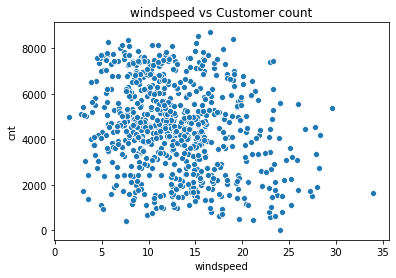

In [24]:
# Analysing windspeed column
sns.scatterplot(data=bike,x='windspeed',y='cnt')
plt.title('windspeed vs Customer count')
plt.show()

#####  Insight:
- We can see that as the wind speed increases the count of customers decreases so they are inversely correlated.

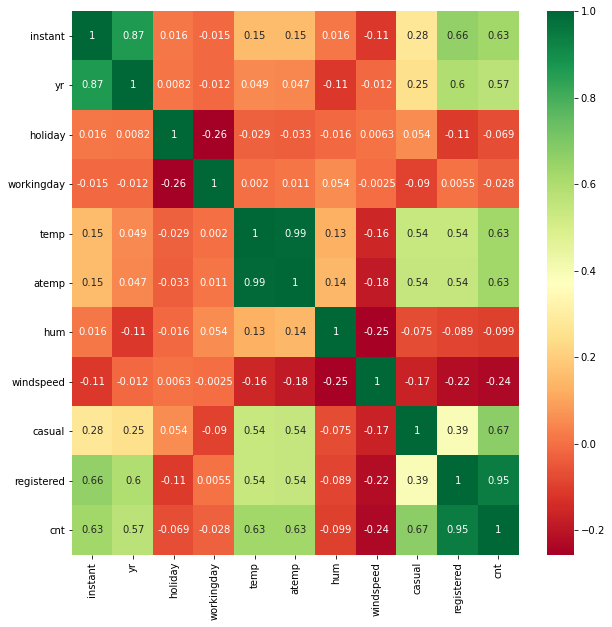

In [25]:
plt.figure(figsize=[10,10])
sns.heatmap(bike.corr(),annot=True,cmap='RdYlGn')
plt.show()

##### Inference:
- By plotting heatmap we can conclude that temperature and yr is positively correlated with cnt.
- we can also see that windspeed is negatively correlated with cnt.
- Resgistered and casual is very high correlated with cnt and is also target variable so we should remove them before building model.
- There are many variables with high multicollenearity like temp and atemp ,instant and yr etc which must be taken to consideration while building the model.

### Step 3 : Data preparation

In [26]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#####  Dummy variable :

In [27]:
# preparing the dummy variable for categorical column (non binary columns)
season=pd.get_dummies(bike[['season','weathersit','mnth','weekday']],drop_first=True)
season.head()

,season_Summer,season_Fall,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# merging the season data frame with bike data frame and dropping the repeated column
bike = pd.concat([bike,season],axis=1)
bike.drop(['season','weathersit','mnth','weekday'],axis=1,inplace=True)
bike.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# dropping the columns which won't be useful for making the model
bike.drop(['instant','dteday'],axis=1,inplace=True)


###  Step 4: Splitting the Data into Training and Testing Sets / Rescaling

In [30]:
#splitting the data into testing and training dataset
train_df,test_df=train_test_split(bike,train_size=0.7,random_state=100)

In [31]:
# checking if it is created properly
print(train_df.shape)
print(test_df.shape)

(510, 32)
(220, 32)


##### Rescaling the feature

In [32]:
# using MinMaxScaling for numerical columns only leaving columns with values 1/0 as it is as it wont have any effect by min max scaling
scaling_col=['temp','atemp','hum','windspeed','casual','registered','cnt']
scaler=MinMaxScaler()

In [33]:
# scaling all the numeric columns 
train_df[scaling_col]=scaler.fit_transform(train_df[scaling_col])

In [34]:
# Checking if the dataframe is scaled properly
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.080392,0.084314,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.272166,0.278131,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- As all the columns are between 0 and 1 so we can say that we have sucessfully scaled the columns.

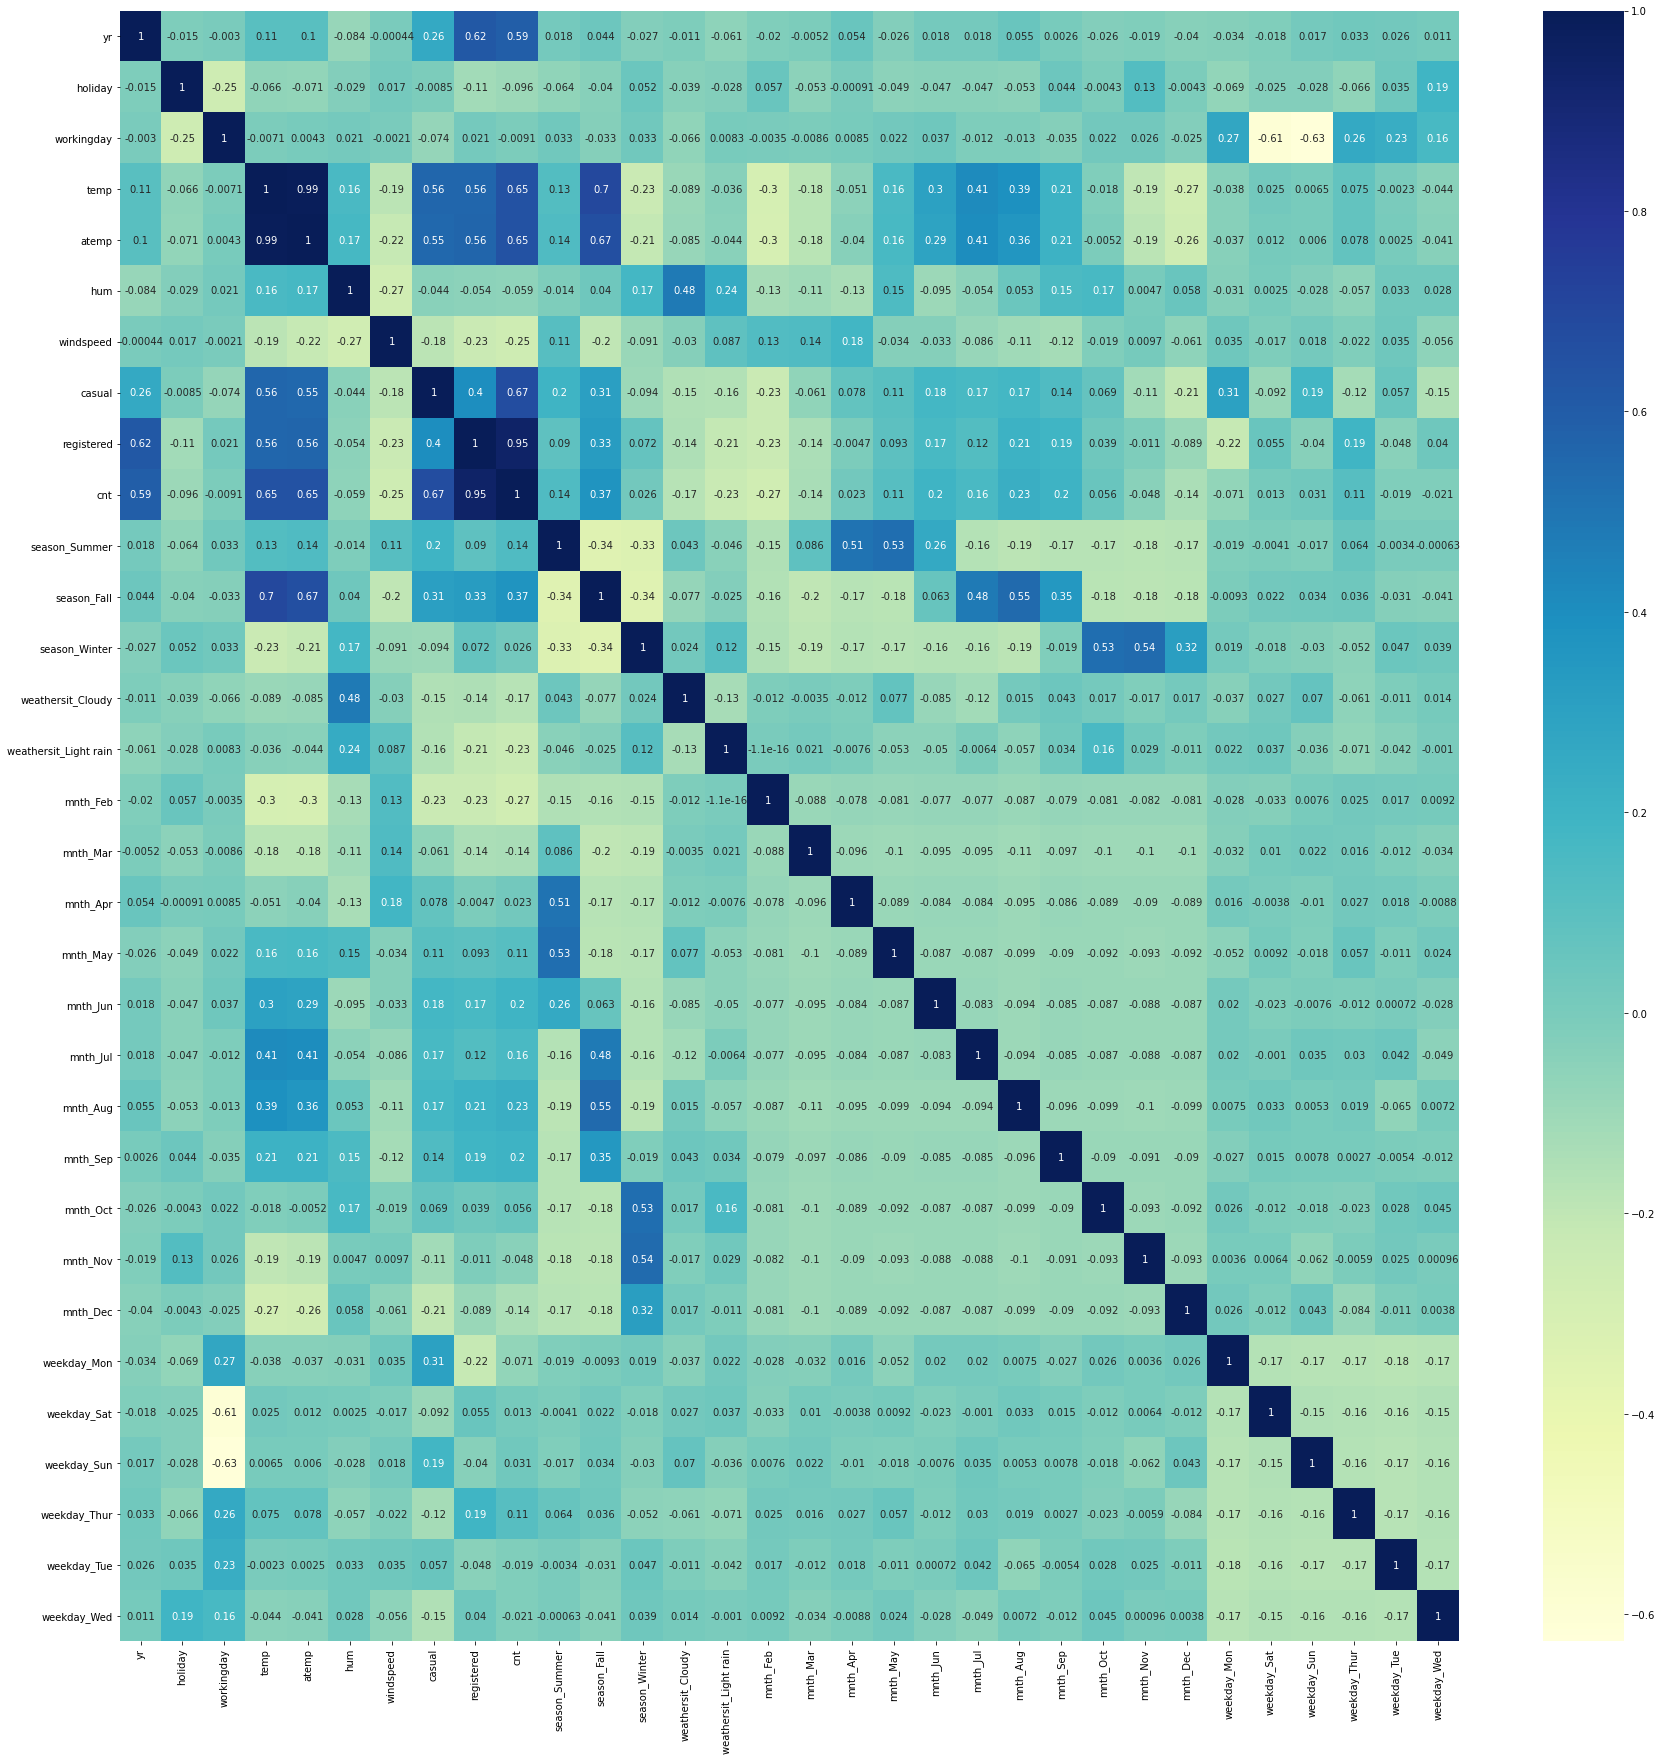

In [35]:
# lets check the correlation of variables
plt.figure(figsize = (30, 30))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Insight:
- we can see that there is a good correlation of yr,temp,registered and casual columns with cnt(target column).
- we can also observe that weathersit_Lightrain columns are negatively correlated with the cnt column. 

In [36]:
# lets remove some of the independent columns having high correlation and less business interpretation
# This is important because these column will increase multicollinearity and increase no of iterations to get the correct model
# we are removing registered and casual as this is similar to target variable and this are also dependent variables
cor_col=['atemp','registered','casual']
train_df.drop(cor_col,axis=1,inplace=True)

##### Dividing the dataframe into X and y for model building 

In [37]:
# preparing X and y
y=train_df.pop('cnt')
X=train_df

In [38]:
# checking if it is created correctly
y.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [39]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Summer,season_Fall,season_Winter,weathersit_Cloudy,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Step 5: Building the model

#####  Getting top 15 predictors of customer count using Recursive feature elimination (RFE)

In [40]:
# Using RFE for coarse filtering of the predictors and get 15 best predictors
lr=LinearRegression()
lr.fit(X,y)

rfe=RFE(lr,15)
rfe=rfe.fit(X,y)

In [41]:
print(list(zip(X.columns,rfe.support_,rfe.ranking_)))

[('yr', True, 1), ('holiday', True, 1), ('workingday', False, 4), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_Summer', True, 1), ('season_Fall', True, 1), ('season_Winter', True, 1), ('weathersit_Cloudy', True, 1), ('weathersit_Light rain', True, 1), ('mnth_Feb', False, 9), ('mnth_Mar', True, 1), ('mnth_Apr', False, 3), ('mnth_May', True, 1), ('mnth_Jun', False, 2), ('mnth_Jul', False, 10), ('mnth_Aug', True, 1), ('mnth_Sep', True, 1), ('mnth_Oct', True, 1), ('mnth_Nov', False, 11), ('mnth_Dec', False, 12), ('weekday_Mon', False, 8), ('weekday_Sat', False, 5), ('weekday_Sun', False, 6), ('weekday_Thur', False, 14), ('weekday_Tue', False, 7), ('weekday_Wed', False, 13)]


In [42]:
col=X.columns[rfe.support_]

In [43]:
# top 15 predictors of cnt(target column)
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Fall', 'season_Winter', 'weathersit_Cloudy',
       'weathersit_Light rain', 'mnth_Mar', 'mnth_May', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct'],
      dtype='object')

In [44]:
# New X_train with only top 15 predictors
X_train=X[col]

In [45]:
# just for consistant labeling
y_train=y

##### Building the model using statsmodel  for better statistical details

##### Model-1

In [46]:
# adding constant column to X_train 
X_train_sm=sm.add_constant(X_train)

In [47]:
# Making backward selection model
lm=sm.OLS(y_train,X_train_sm).fit()

In [48]:
# checking summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.00e-188
Time:                        14:23:15   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2374      0.027      8.665      0.000       0.184       0.291
yr                        0.2304      0.008     28.453      0.000       0.215       0.246
holiday                  -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp                      0.4869      0.034     14.119      0.000       0.419       0.555
hum                      -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed                -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_Summer             0.1166      0.015      7.527      0.000       0.086       0.147
season_Fall               0.0425      0.023      1.847      0.065      -0.003       0.088
season_Winter             0.1530      0.014     10.801      0.000       0.125       0.181
weathersit_Cloudy        -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_Light rain    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
mnth_Mar                  0.0323      0.015      2.196      0.029       0.003       0.061
mnth_May                  0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_Aug                  0.0509      0.017      2.913      0.004       0.017       0.085
mnth_Sep                  0.1207      0.017      6.984      0.000       0.087       0.155
mnth_Oct                  0.0407      0.018      2.314      0.021       0.006       0.075
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_Fall,8.80
4,windspeed,3.81
5,season_Summer,3.75
7,season_Winter,3.11
8,weathersit_Cloudy,2.15
0,yr,2.05
12,mnth_Aug,1.85
11,mnth_May,1.68


- As season_Fall column have both high VIF and high p value we should drop that column and rebuild the model.

##### Model -2 

In [50]:
# dropping the season_Fall column
X_train_sm.drop('season_Fall',axis=1,inplace=True)

In [51]:
X_train_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Mar,mnth_May,mnth_Aug,mnth_Sep,mnth_Oct
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,1,0,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0


In [52]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [53]:
# checking summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.87e-189
Time:                        14:23:15   Log-Likelihood:                 512.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     495   BIC:                            -930.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2367      0.027      8.621      0.000       0.183       0.291
yr                        0.2291      0.008     28.334      0.000       0.213       0.245
holiday                  -0.0910      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.5352      0.023     23.728      0.000       0.491       0.580
hum                      -0.1879      0.038     -4.975      0.000      -0.262      -0.114
windspeed                -0.1883      0.026     -7.349      0.000      -0.239      -0.138
season_Summer             0.0989      0.012      8.113      0.000       0.075       0.123
season_Winter             0.1400      0.012     11.357      0.000       0.116       0.164
weathersit_Cloudy        -0.0529      0.010     -5.063      0.000      -0.073      -0.032
weathersit_Light rain    -0.2378      0.026     -9.020      0.000      -0.290      -0.186
mnth_Mar                  0.0261      0.014      1.819      0.069      -0.002       0.054
mnth_May                  0.0224      0.018      1.274      0.203      -0.012       0.057
mnth_Aug                  0.0623      0.016      3.795      0.000       0.030       0.094
mnth_Sep                  0.1309      0.016      7.978      0.000       0.099       0.163
mnth_Oct                  0.0361      0.017      2.068      0.039       0.002       0.070
==============================================================================
Omnibus:                       64.808   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.941
Skew:                          -0.685   Prob(JB):                     1.24e-32
Kurtosis:                       5.245   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# dropping column for measuring VIF 
X_train.drop('season_Fall',axis=1,inplace=True)

In [55]:
# checking multicollinearity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.87
2,temp,10.03
4,windspeed,3.75
6,season_Winter,2.33
5,season_Summer,2.31
7,weathersit_Cloudy,2.14
0,yr,2.03
10,mnth_May,1.62
11,mnth_Aug,1.62
13,mnth_Oct,1.60


- As mnth_May column have high P-value we will remove it and make a new model.(p-value have higher priority comp to VIF)

##### Model-3

In [56]:
# dropping the mnth_May column
X_train_sm.drop('mnth_May',axis=1,inplace=True)

In [57]:
X_train_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Mar,mnth_Aug,mnth_Sep,mnth_Oct
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,1,0,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0


In [58]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [59]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.94e-190
Time:                        14:23:15   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2326      0.027      8.525      0.000       0.179       0.286
yr                        0.2287      0.008     28.289      0.000       0.213       0.245
holiday                  -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp                      0.5371      0.023     23.855      0.000       0.493       0.581
hum                      -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed                -0.1893      0.026     -7.388      0.000      -0.240      -0.139
season_Summer             0.1059      0.011      9.743      0.000       0.085       0.127
season_Winter             0.1393      0.012     11.304      0.000       0.115       0.163
weathersit_Cloudy        -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weathersit_Light rain    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
mnth_Mar                  0.0233      0.014      1.642      0.101      -0.005       0.051
mnth_Aug                  0.0605      0.016      3.699      0.000       0.028       0.093
mnth_Sep                  0.1292      0.016      7.897      0.000       0.097       0.161
mnth_Oct                  0.0355      0.017      2.032      0.043       0.001       0.070
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# dropping column for finding out VIF for the column
X_train.drop('mnth_May',axis=1,inplace=True)

In [61]:
# checking multicollinearity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,season_Winter,2.32
7,weathersit_Cloudy,2.14
0,yr,2.02
5,season_Summer,1.84
10,mnth_Aug,1.61
12,mnth_Oct,1.60
11,mnth_Sep,1.34


- As mnth_Mar column have high P-value we will remove it and make a new model.(p-value have higher priority comp to VIF)

##### Model - 4

In [62]:
# dropping the mnth_Mar column
X_train_sm.drop('mnth_Mar',axis=1,inplace=True)

In [63]:
X_train_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Aug,mnth_Sep,mnth_Oct
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0


In [64]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [65]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.49e-190
Time:                        14:23:16   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2390      0.027      8.838      0.000       0.186       0.292
yr                        0.2289      0.008     28.264      0.000       0.213       0.245
holiday                  -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                      0.5316      0.022     23.836      0.000       0.488       0.575
hum                      -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed                -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_Summer             0.1058      0.011      9.719      0.000       0.084       0.127
season_Winter             0.1353      0.012     11.180      0.000       0.112       0.159
weathersit_Cloudy        -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weathersit_Light rain    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
mnth_Aug                  0.0585      0.016      3.583      0.000       0.026       0.091
mnth_Sep                  0.1277      0.016      7.803      0.000       0.096       0.160
mnth_Oct                  0.0358      0.018      2.046      0.041       0.001       0.070
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train.drop('mnth_Mar',axis=1,inplace=True)

In [67]:
# checking multicollinearity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,season_Winter,2.25
7,weathersit_Cloudy,2.13
0,yr,2.02
5,season_Summer,1.84
9,mnth_Aug,1.60
11,mnth_Oct,1.60
10,mnth_Sep,1.34


- As hum column have high VIF so we will drop it and make the new model.

#####  Model - 5 

In [68]:
# dropping the hum column
X_train_sm.drop('hum',axis=1,inplace=True)

In [69]:
X_train_sm.head()

,const,yr,holiday,temp,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Aug,mnth_Sep,mnth_Oct
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,1,0,0,0,0
111,1.0,0,0,0.345824,0.380981,1,0,1,0,0,0,0


In [70]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [71]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          9.45e-187
Time:                        14:23:16   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1346      0.017      8.014      0.000       0.102       0.168
yr                        0.2329      0.008     28.281      0.000       0.217       0.249
holiday                  -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp                      0.5099      0.022     22.823      0.000       0.466       0.554
windspeed                -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_Summer             0.1026      0.011      9.237      0.000       0.081       0.124
season_Winter             0.1266      0.012     10.345      0.000       0.103       0.151
weathersit_Cloudy        -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit_Light rain    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
mnth_Aug                  0.0569      0.017      3.406      0.001       0.024       0.090
mnth_Sep                  0.1208      0.017      7.245      0.000       0.088       0.154
mnth_Oct                  0.0311      0.018      1.741      0.082      -0.004       0.066
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train.drop('hum',axis=1,inplace=True)

In [73]:
# checking multicollinearity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_Winter,1.93
4,season_Summer,1.83
8,mnth_Aug,1.59
10,mnth_Oct,1.59
6,weathersit_Cloudy,1.49
9,mnth_Sep,1.34
7,weathersit_Light rain,1.10


- As mnth_Oct has high p-value we will drop it and make a new model.

##### Model-6

In [74]:
# dropping the mnth_Oct column
X_train_sm.drop('mnth_Oct',axis=1,inplace=True)

In [75]:
X_train_sm.head()

,const,yr,holiday,temp,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Aug,mnth_Sep
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,1,0,0,0
111,1.0,0,0,0.345824,0.380981,1,0,1,0,0,0


In [76]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [77]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.62e-187
Time:                        14:23:16   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1307      0.017      7.837      0.000       0.098       0.163
yr                        0.2326      0.008     28.191      0.000       0.216       0.249
holiday                  -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp                      0.5173      0.022     23.546      0.000       0.474       0.561
windspeed                -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_Summer             0.1012      0.011      9.116      0.000       0.079       0.123
season_Winter             0.1371      0.011     12.843      0.000       0.116       0.158
weathersit_Cloudy        -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_Light rain    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
mnth_Aug                  0.0541      0.017      3.249      0.001       0.021       0.087
mnth_Sep                  0.1163      0.017      7.046      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X_train.drop('mnth_Oct',axis=1,inplace=True)

In [79]:
# checking multicollinearity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_Summer,1.82
8,mnth_Aug,1.58
6,weathersit_Cloudy,1.49
5,season_Winter,1.48
9,mnth_Sep,1.31
7,weathersit_Light rain,1.08
1,holiday,1.04


- On trial and error we found out that even after removing mnth_Aug predictor we are getting similar efficiency so to get a lighter model we will drop mnth_Aug column.

##### Model - 7

In [80]:
# dropping the mnth_Aug column
X_train_sm.drop('mnth_Aug',axis=1,inplace=True)

In [81]:
X_train_sm.head()

,const,yr,holiday,temp,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Sep
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,1,0,0
111,1.0,0,0,0.345824,0.380981,1,0,1,0,0


In [82]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [83]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.83e-186
Time:                        14:23:16   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1259      0.017      7.508      0.000       0.093       0.159
yr                        0.2329      0.008     27.962      0.000       0.216       0.249
holiday                  -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                      0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_Summer             0.0881      0.010      8.437      0.000       0.068       0.109
season_Winter             0.1293      0.011     12.314      0.000       0.109       0.150
weathersit_Cloudy        -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit_Light rain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
mnth_Sep                  0.1012      0.016      6.330      0.000       0.070       0.133
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_train.drop('mnth_Aug',axis=1,inplace=True)

In [85]:
# checking multicollinearity

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_Summer,1.57
6,weathersit_Cloudy,1.48
5,season_Winter,1.37
8,mnth_Sep,1.20
7,weathersit_Light rain,1.08
1,holiday,1.04


- On trial and error we found out that even after removing holiday predictor we are getting similar efficiency so to get a lighter model we will drop holiday column.

#####  Model - 8 

In [86]:
# dropping the holiday column
X_train_sm.drop('holiday',axis=1,inplace=True)

In [87]:
X_train_sm.head()

,const,yr,temp,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Sep
576,1.0,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0.395666,0.188475,1,0,1,0,0
111,1.0,0,0.345824,0.380981,1,0,1,0,0


In [88]:
# Making backward selection model 
lm=sm.OLS(y_train,X_train_sm).fit()

In [89]:
# checking significance of the coefficient
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.53e-184
Time:                        14:23:16   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1209      0.017      7.140      0.000       0.088       0.154
yr                        0.2332      0.008     27.645      0.000       0.217       0.250
temp                      0.5527      0.020     27.295      0.000       0.513       0.592
windspeed                -0.1552      0.026     -6.041      0.000      -0.206      -0.105
season_Summer             0.0894      0.011      8.460      0.000       0.069       0.110
season_Winter             0.1281      0.011     12.051      0.000       0.107       0.149
weathersit_Cloudy        -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_Light rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
mnth_Sep                  0.0978      0.016      6.052      0.000       0.066       0.130
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X_train.drop('holiday',axis=1,inplace=True)

In [91]:
# checking multicollinearity

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,temp,3.68
2,windspeed,3.03
0,yr,2.00
3,season_Summer,1.57
5,weathersit_Cloudy,1.48
4,season_Winter,1.37
7,mnth_Sep,1.20
6,weathersit_Light rain,1.08


In [92]:
# checking the parameters in the best fit model
lm.params

const                    0.120918
yr                       0.233163
temp                     0.552655
windspeed               -0.155224
season_Summer            0.089399
season_Winter            0.128144
weathersit_Cloudy       -0.076670
weathersit_Light rain   -0.278528
mnth_Sep                 0.097843
dtype: float64

##### This is the best fit model as we will get sudden decrease in accuracy if we further drop any other predictor. 

###  Step 6 : Residual analysis

In [93]:
# Getting predicted values from the training set
y_train_pred=lm.predict(X_train_sm)

In [94]:
# calculating residual
res=y_train - y_train_pred

Text(0.5, 0, 'Errors')

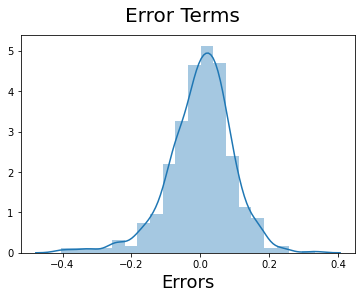

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

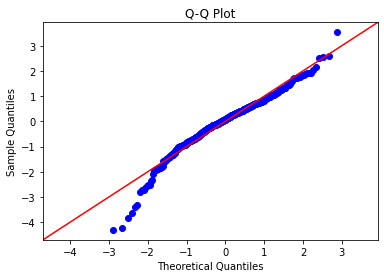

In [96]:
# making Q-Q plot to confirm that error terms are normally distributed 
sm.qqplot(( y_train - y_train_pred), fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

- Error terms are normally distributed (which is infact, one of the major assumptions of linear regression).

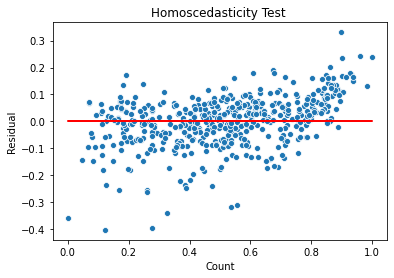

In [97]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable.
# error terms are also indipendent as there is no visible pattern.
sns.scatterplot(y_train,(res))
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Homoscedasticity Test ')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- Error terms are Homoscedastic, error terms are respecting this assumption.
- Error terms are indipendent,as we cannot see any pattern in the error terms we can say that it is respecting this assumption too.

In [98]:

# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.8 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.8 is 2.0423


- As Durbin-Watson test is very near to 2 this indicates that there is no autocorrelation between the residuals.This implies that residuals are indipendent.

### Step 7: Making Predictions Using the Final Model

In [99]:
# Preparing the test set
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,240,2419,2659,...,0,1,0,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,736,4232,4968,...,0,0,0,0,0,1,0,0,0,0


In [100]:
# scaling the test_df
test_df[scaling_col]=scaler.transform(test_df[scaling_col])


In [101]:
# checking if the scaling is done correctly
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,...,0.086364,0.086364,0.072727,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,...,0.281541,0.281541,0.260281,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# getting X and y 
y_test=test_df.pop('cnt')
X_test=test_df

In [103]:
# checking if its done correctly
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 31)


In [104]:
# Keeping only those variables which are present in the model
X_test=X_test[X_train.columns]

In [105]:
# adding constant column
X_test_sm=sm.add_constant(X_test)

In [106]:
X_test_sm.head()

,const,yr,temp,windspeed,season_Summer,season_Winter,weathersit_Cloudy,weathersit_Light rain,mnth_Sep
184,1.0,0,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,1,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0


In [107]:
# predicting the cnt through test data set
y_test_pred=lm.predict(X_test_sm)

### Step 9: Model Evaluation

In [108]:
# R2 accuracy on train set
Train_r2=round(r2_score(y_train,y_train_pred),2)


In [109]:
# R2 accuracy on test set
Test_r2=round(r2_score(y_test,y_test_pred),2)

In [110]:
# adjusted R2 for the train set
# n is number of rows in test dataset
n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]
r2=round(r2_score(y_train,y_train_pred),2)
# We find the Adjusted R-squared using the formula
Train_adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)


In [111]:
# adjusted R2 for the test set
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
r2=round(r2_score(y_test,y_test_pred),2)
# We find the Adjusted R-squared using the formula
Test_adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)


In [112]:
# Making a data frame which has accuracy matrix so that it can be compared easily
acc_df = pd.DataFrame({'Metrics': ['Train_R2_Score', 'Train_Adj_R2_Score', 'Test_R2_Score','Test_Adj_R2_Score'],'Accuracy': [Train_r2,Train_adjusted_r2,Test_r2,Test_adjusted_r2]})
acc_df=acc_df.set_index('Metrics')
acc_df

,Accuracy
Metrics,
Train_R2_Score,0.83
Train_Adj_R2_Score,0.83
Test_R2_Score,0.79
Test_Adj_R2_Score,0.78


- Accuracy difference on test and train set is less than or equal to 5% so we can say that model is not overfitting and it is a good fit.

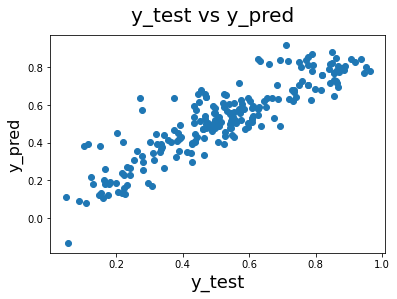

In [113]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

We can say that the equation of our best fitted line is (Equation is written in the decending order of co-efficients):

$ Count =0.121 + 0.553 \times temp + 0.233  \times  yr + 0.128 \times season Winter + 0.098 \times mnth Sep + 0.089 \times season Summer - 0.076 \times weathersit Cloudy  - 0.155 \times windspeed - 0.279 \times weathersit Light rain $
